In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def visualize(datas, rows, cols):
    n = len(datas)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10), sharey=True, sharex=True) 
    axes = axes.flatten() 
    
    for i, data in enumerate(datas):
        if i == rows*cols:
            break
        data = data.reshape(2, 2)
        axes[i].imshow(data, cmap='gray', interpolation='nearest')
        axes[i].axis('off')
        
    
    plt.show()

## Faces Examples

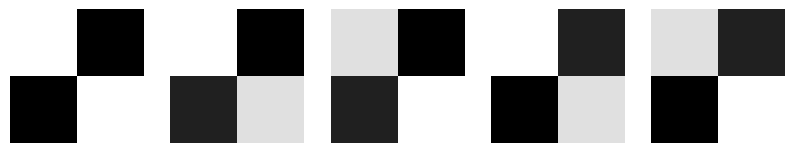

In [3]:
faces = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.2,0.1,0.9])]

visualize(faces, 1, 5)

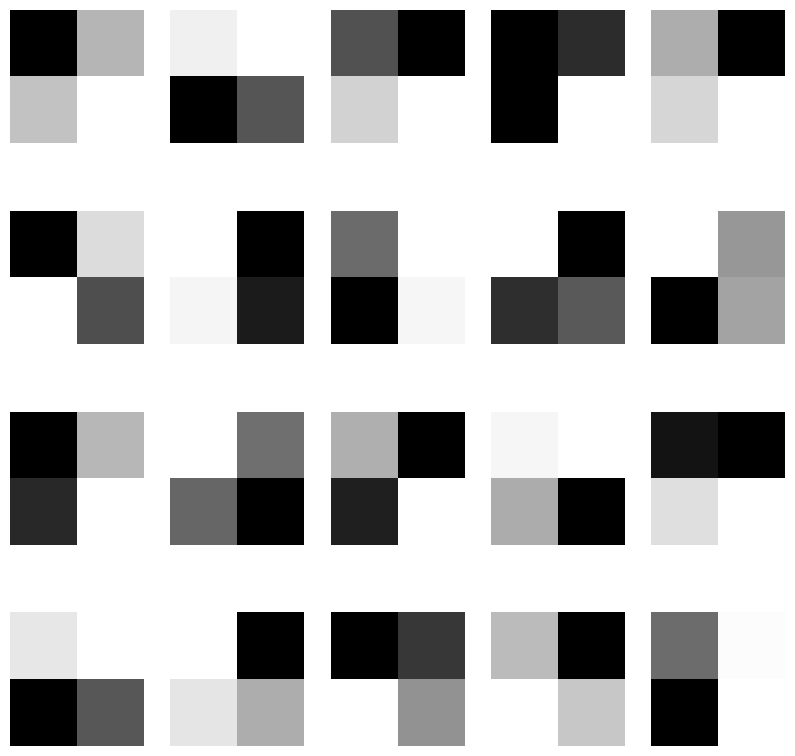

In [4]:
noise = [np.random.rand(2,2) for i in range(20)]
visualize(noise, 4, 5)


In [5]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [6]:
class Discriminator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]


In [7]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [8]:
np.random.seed(42)

# Hiperparametreler
learning_rate = 0.01
epochs = 1000

# GAN
D = Discriminator()
G = Generator()

# Hata grafiği için
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        # Discriminator ağırlıklarını gerçek face güncellemek için
        D.update_from_image(face)
    
        # Sahte bir face oluşturmak için rastgele bir sayı
        z = random.rand()

        # Discriminator hatasını hesaplamak için
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        # Generator hatasını hesaplamak için
        errors_generator.append(G.error(z, D))
        
        # Sahte face oluşturmak için
        noise = G.forward(z)
        
        # Discriminator ağırlıklarını sahte face ile güncelleme
        D.update_from_noise(noise)
    
        # Generator ağırlıklarını sahte face ile güncelleme
        G.update(z, D)

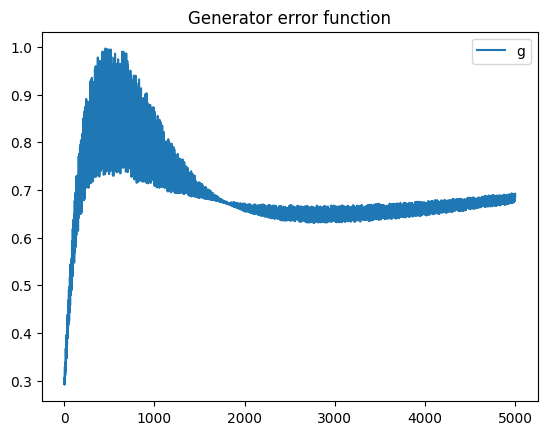

Text(0.5, 1.0, 'Discriminator error function')

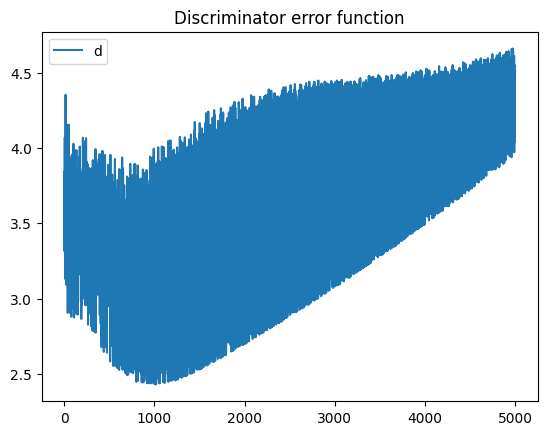

In [9]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

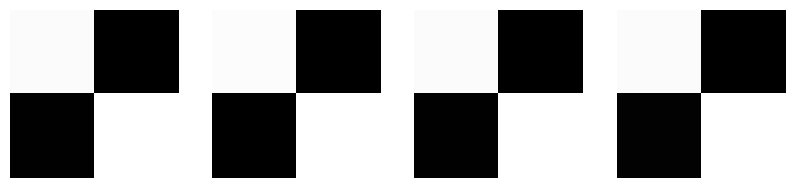

[0.94687814 0.03401057 0.04081007 0.96308874]
[0.95653664 0.03437674 0.03579702 0.97064009]
[0.9505632  0.03414175 0.03893516 0.96599688]
[0.94227834 0.03385899 0.04309359 0.95941495]


In [10]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = visualize(generated_images, 1, 4)
for i in generated_images:
    print(i)